In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

from ipywidgets import Output

import pyneuralnet as pn
import datamaker as dm


In [2]:
X, Y = dm.load_planar_dataset()
print(X.shape)
print(Y.shape)

(2, 400)
(1, 400)


Progress: [####################] 100.0%



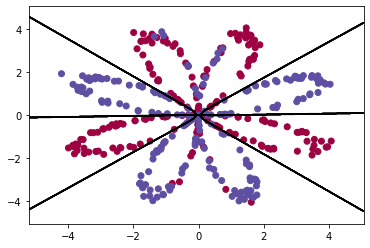

[[0.918]] [[0.915]] [[0.92]]


In [3]:
np.random.seed(2)
layout = ((4, 'tanh'),
          (1, 'sigmoid'),
         ) 

network = pn.buildNetwork(layout, X.shape[0])

num_iterations = 10000
learning_rate = 1.2

newtork, costs, accs = pn.gradientDescent(X, Y, network, num_iterations, learning_rate,
                        costfunction='logistic', showprogress=True, debugmsg='cost')


pn.plot2DBoundary(X, Y, network)
H = pn.predict(X, network)
acc, prec, rec = pn.evaluateModel(H, Y)
print(acc, prec, rec)

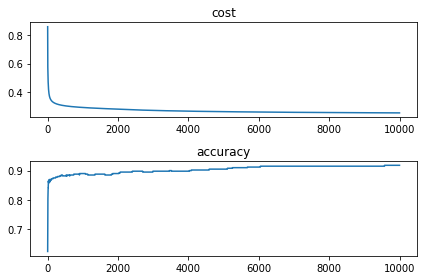

In [4]:
plt.subplot(211)
plt.plot(costs, label='cost')
plt.title('cost')

plt.subplot(212)
plt.plot(accs, label='accuracy')
plt.title('accuracy')

plt.tight_layout()
plt.show()

## Gradient Checking Tool


In [ ]:
def function(H, Y):
    m = H.shape[1]
    return -1 / m * (Y @ np.log(H.T) + (1 - Y) @ np.log(1 - H.T))

def gradient(H, Y):
    m = H.shape[1]
    return 1 / m * np.sum(np.divide(-Y, H) + np.divide(1 - Y, 1 - H), keepdims=True)

def function2(H, Y):
    m = H.shape[1]
    return -1 / m * np.sum(np.multiply(np.log(H), Y) + np.multiply((1 - Y), np.log(1 - H)), keepdims=True)

def gradient2(H, Y):
    m = H.shape[1]
    return 1 / m * np.sum(np.divide((H - Y), H * (1 - H)), keepdims=True) 

np.random.seed(20)
Z = np.random.rand(1, 3)
print('Input\n', Z, '\n')

Y = np.array([[0, 1, 1]])
print('Correct Answer\n', Y, '\n')

A = function(Z, Y)
print('Output\n', A, '\n')
A = function2(Z, Y)
print('Output 2\n', A, '\n')

dAdZ = gradient(Z, Y)
print('Gradient\n', dAdZ, '\n')

eps = 1e-5
plus = function(Z + eps, Y)
minus = function(Z - eps, Y)
dAdZ_check = (plus - minus) / (2 * eps)
print('Gradient Check\n', dAdZ_check)


dAdZ = gradient2(Z, Y)
print('\nGradient 2\n', dAdZ, '\n')

eps = 1e-5
plus = function2(Z + eps, Y)
minus = function2(Z - eps, Y)
dAdZ_check = (plus - minus) / (2 * eps)
print('Gradient 2 Check\n', dAdZ_check)

## Make fake data

In [ ]:
import csv

f = 'tests/linear3.csv'

def makeFakeData_LinearBoundary(f):

    b = 0.23
    a1 = 0.1
    a2 = 0.5

    with open(f, 'w') as csvFile:
        writer = csv.writer(csvFile)
        for i in range(50):
            for j in range(20):
                x1 = round(float(np.random.randn(1)), 2)
                x2 = round(float(np.random.randn(1)), 2)
                y = 1*((a2*x2) > (a1*x1 + b)) 
                inp = [x1, x2, y]
#                 print(inp)
                writer.writerow(inp)

    csvFile.close()

makeFakeData_LinearBoundary(f)

In [ ]:
np.where()

In [ ]:
a = [[2, 3, 4], [2, 1, 4]]
print(*a)

## Function testing